In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Unemployment in India.csv')
df.columns=df.columns.str.strip()
df.dropna(inplace=True)

In [6]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [8]:
df['Month']=df['Date'].dt.month
df['Month_int']=df['Month'].apply(lambda x:int(x))
df['Month_name']=df['Date'].dt.strftime('%b')
df['Year']=df['Date'].dt.year

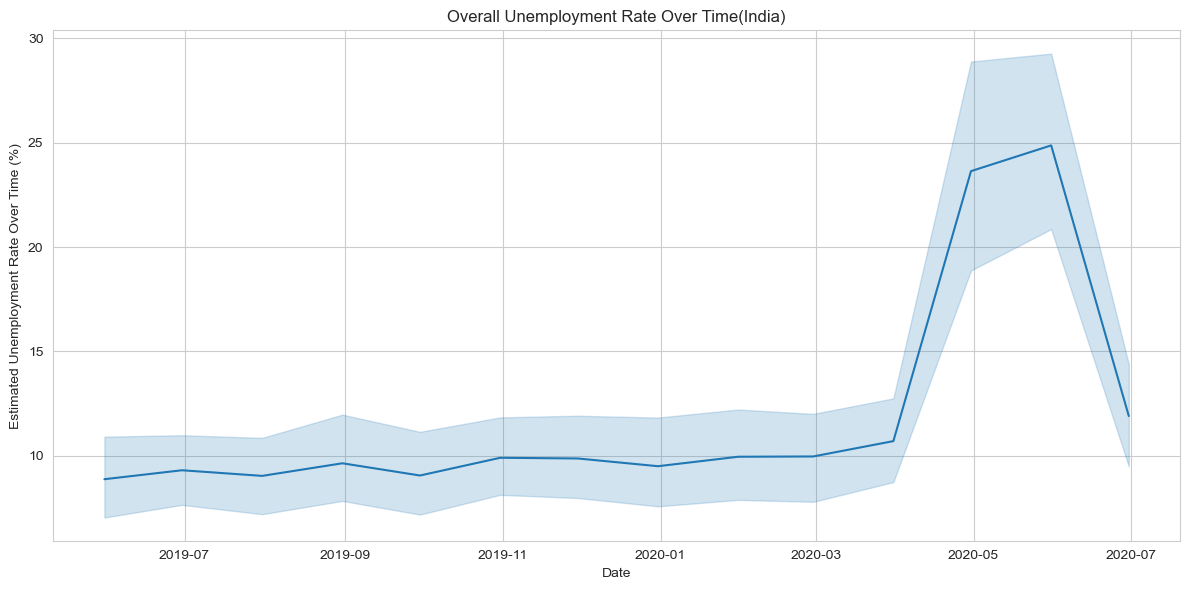

In [14]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(x='Date',y='Estimated Unemployment Rate (%)',data=df)
plt.title('Overall Unemployment Rate Over Time(India)')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate Over Time (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

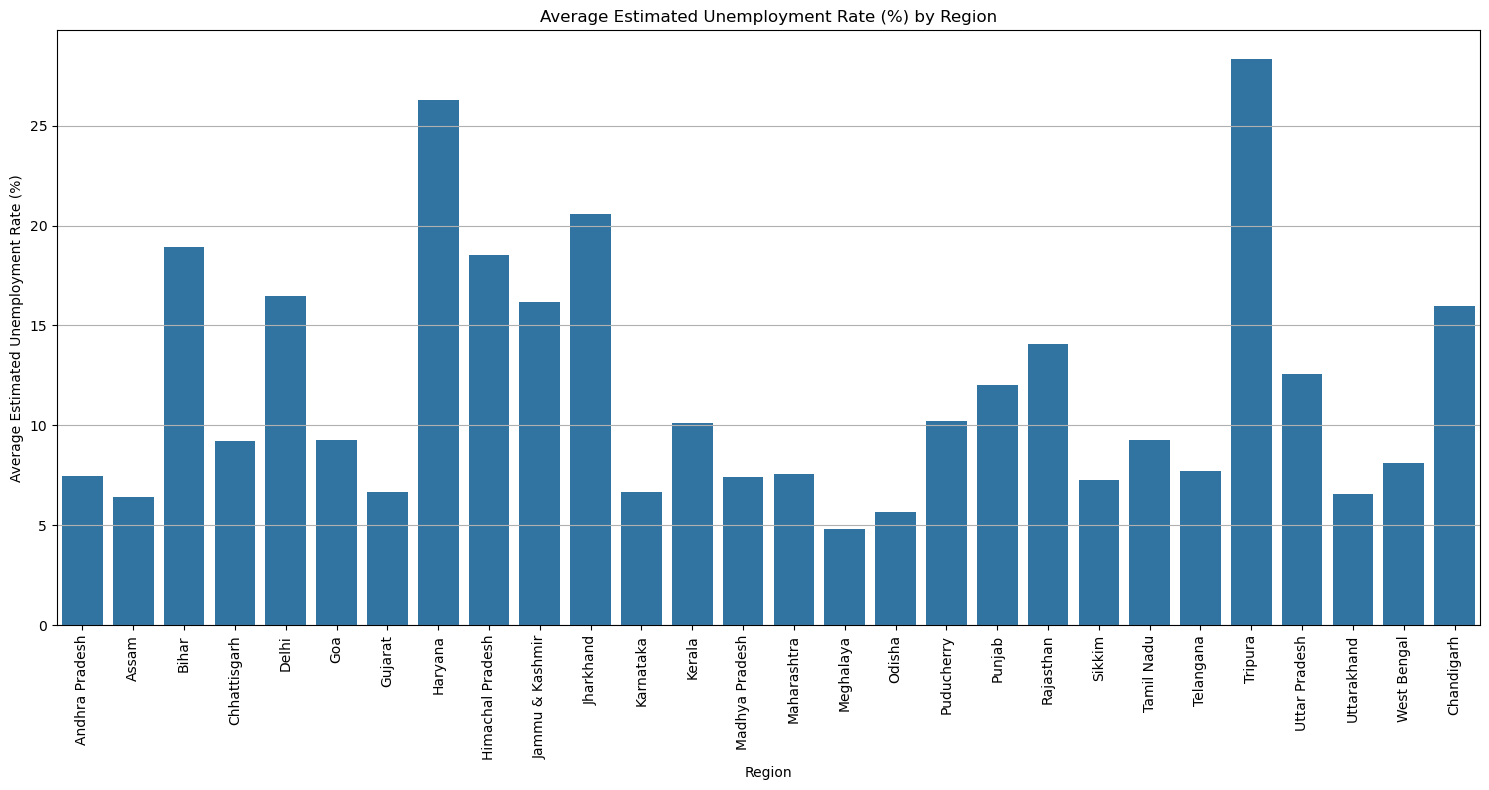

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Unemployment in India.csv')
df.columns=df.columns.str.strip()
df.dropna(inplace=True)
plt.figure(figsize=(15, 8))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, errorbar=None)
plt.title('Average Estimated Unemployment Rate (%) by Region')
plt.xlabel('Region')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

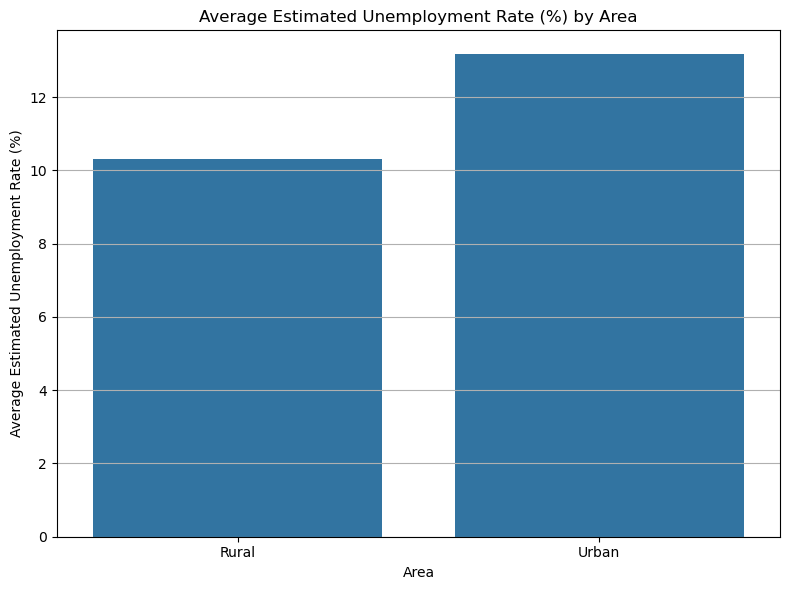

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Area', y='Estimated Unemployment Rate (%)', data=df, errorbar=None)
plt.title('Average Estimated Unemployment Rate (%) by Area')
plt.xlabel('Area')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Unemployment in India.csv')

df.columns = df.columns.str.strip()

date_column_name = 'Date'

if date_column_name in df.columns:
    df[date_column_name] = pd.to_datetime(df[date_column_name], dayfirst=True, errors='coerce')
    df['Month_name'] = df[date_column_name].dt.strftime('%b')
    df['Year'] = df[date_column_name].dt.year
else:
    raise KeyError(f"The column '{date_column_name}' was not found in your DataFrame. "
                   "Please check your CSV file's column names and update 'date_column_name' variable.")

unemployment_by_month_year = df.groupby(['Month_name', 'Year'], as_index=False)['Estimated Unemployment Rate (%)'].mean()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

unemployment_by_month_year['Month_name'] = pd.Categorical(unemployment_by_month_year['Month_name'], categories=month_order, ordered=True)

unemployment_by_month_year = unemployment_by_month_year.sort_values(by=['Year', 'Month_name'])

print(unemployment_by_month_year.head(10))

   Month_name    Year  Estimated Unemployment Rate (%)
9         May  2019.0                         8.874259
6         Jun  2019.0                         9.303333
5         Jul  2019.0                         9.033889
1         Aug  2019.0                         9.637925
13        Sep  2019.0                         9.051731
12        Oct  2019.0                         9.900909
11        Nov  2019.0                         9.868364
2         Dec  2019.0                         9.497358
4         Jan  2020.0                         9.950755
3         Feb  2020.0                         9.964717


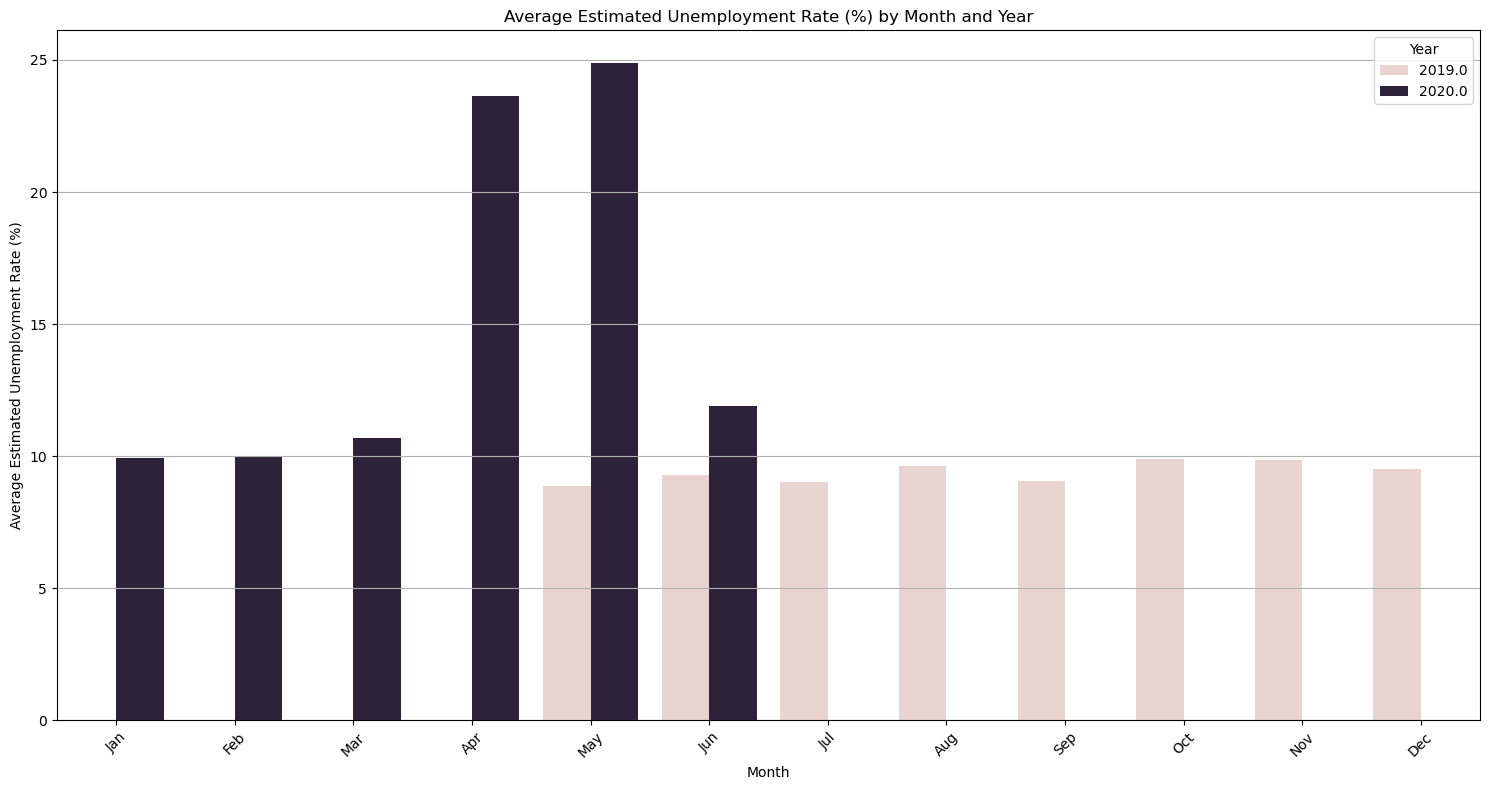

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Month_name', y='Estimated Unemployment Rate (%)', hue='Year', data=unemployment_by_month_year)
plt.title('Average Estimated Unemployment Rate (%) by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

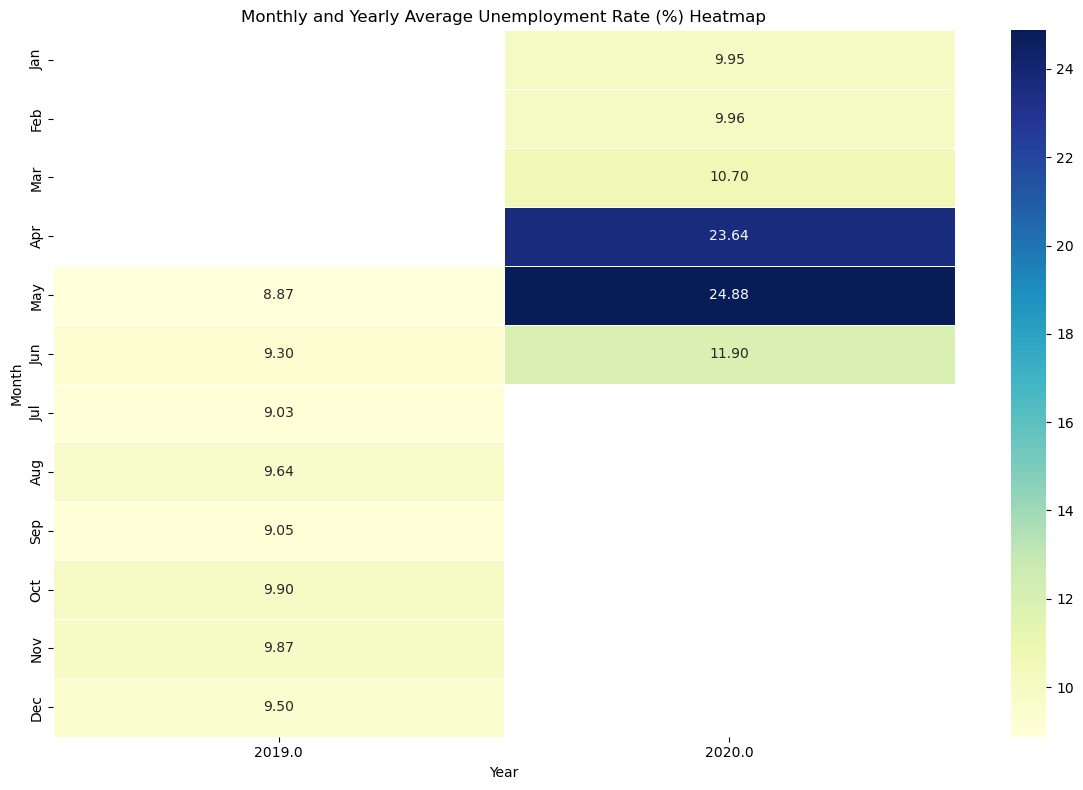

In [13]:
unemployment_pivot = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Month_name', columns='Year', aggfunc='mean')

unemployment_pivot = unemployment_pivot.reindex(month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(unemployment_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Monthly and Yearly Average Unemployment Rate (%) Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()